<a href="https://colab.research.google.com/github/phajavi/404-error/blob/main/mnist_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [3]:
test_df = pd.read_csv("sample_data/mnist_test.csv")
train_df = pd.read_csv("sample_data/mnist_train.csv")




In [4]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_df.shape

(60000, 785)

In [7]:
y=train_df['label']
x=train_df.drop('label',axis=1)

In [8]:
x_for_test_data=test_df[:]

2


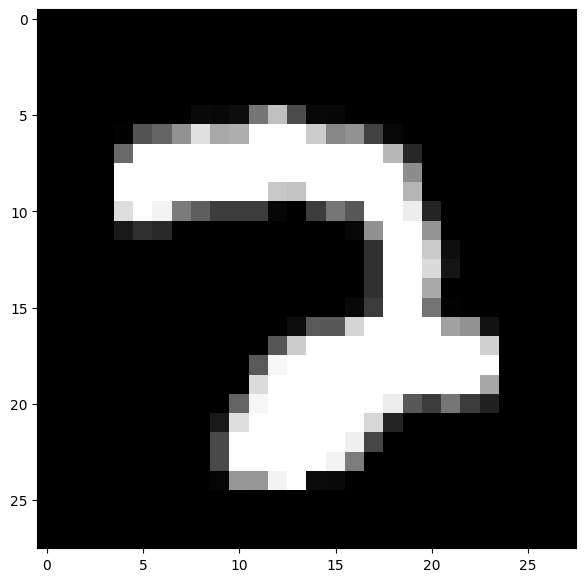

In [9]:
plt.figure(figsize=(7,7))
some_digit=120
some_digit_image = x.iloc[some_digit].to_numpy().reshape(28, 28)
plt.imshow(np.reshape(some_digit_image, (28,28)), cmap=plt.cm.gray)
print(y[some_digit])

In [10]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)



In [11]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((48000, 784), (48000,), (12000, 784), (12000,))

In [12]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
scaler.fit(x_train,y_train)
x_train = scaler.transform(x_train)
x_train.shape

(48000, 784)

In [13]:
# k =5
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
y_prediction = classifier.predict(x_test)
y_prediction

array([9, 3, 8, ..., 9, 9, 2])

In [15]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_prediction))
print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))

0.7955
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1175
           1       0.91      0.98      0.94      1322
           2       0.93      0.62      0.74      1174
           3       0.84      0.88      0.86      1219
           4       0.81      0.83      0.82      1176
           5       0.86      0.63      0.73      1104
           6       0.99      0.76      0.86      1177
           7       0.92      0.52      0.67      1299
           8       0.60      0.96      0.74      1160
           9       0.59      0.90      0.72      1194

    accuracy                           0.80     12000
   macro avg       0.83      0.79      0.79     12000
weighted avg       0.83      0.80      0.79     12000

[[1011    1   14   40   17   53    1    3   33    2]
 [   0 1292    3    3    1    0    0    0   21    2]
 [  33   45  730   53   40    0    5   35  207   26]
 [  11    5    3 1071    2   25    0    3   73   26]
 [   7    3    4    2 

In [16]:
y_prediction_on_test_data = classifier.predict(x_for_test_data.iloc[:, :-1])
y_prediction_on_test_data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([7, 2, 1, ..., 4, 8, 6])

logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state=1000)
log_classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1000)

In [18]:
y_prediction_log=log_classifier.predict(x_test)

In [19]:
y_prediction_log

array([8, 3, 8, ..., 8, 8, 2])

In [20]:
print(accuracy_score(y_test, y_prediction_log))
print(classification_report(y_test, y_prediction_log))
print(confusion_matrix(y_test, y_prediction_log))

0.267
              precision    recall  f1-score   support

           0       1.00      0.23      0.37      1175
           1       0.00      0.00      0.00      1322
           2       0.83      0.52      0.64      1174
           3       0.70      0.66      0.68      1219
           4       0.96      0.07      0.12      1176
           5       0.35      0.07      0.11      1104
           6       1.00      0.11      0.21      1177
           7       1.00      0.00      0.01      1299
           8       0.12      1.00      0.22      1160
           9       0.51      0.07      0.12      1194

    accuracy                           0.27     12000
   macro avg       0.65      0.27      0.25     12000
weighted avg       0.65      0.27      0.24     12000

[[ 266    0   18   20    0  105    0    0  765    1]
 [   0    0    2    8    0    0    0    0 1312    0]
 [   0    0  609   32    0    1    0    0  532    0]
 [   0    0    5  803    0    2    0    0  409    0]
 [   0    0    4    7  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
